## DeepLearning - Reconhecimento de dígitos

In [1]:
# Importando bibliotecas
import numpy as np
np.random.seed(123)

In [2]:
# Importando bibliotecas
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

Using TensorFlow backend.


In [3]:
# Problemas encontrados na hora de gerar a primeira camada de convolução
# Ultima versão do keras alterou o parâmetro do 'image_data_format()'
# Isso fez com que a ordem da proundidade e dimensão do X's fosse alterada na hora do reshape
K.image_data_format()

# Alterando para a forma mais simples de entender utilizou-se o comando abaixo:
K.set_image_dim_ordering('th')

In [4]:
# Importando bibliotecas
from keras.datasets import mnist

In [5]:
# Carregando o dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
# Verificando dimensões do dataset
y_test.shape

(10000,)

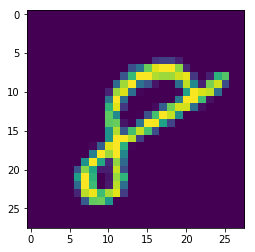

In [7]:
# Plotando uma das observações do dataset
from matplotlib import pylab as plt
%matplotlib inline
plt.imshow(X_train[59999])

In [8]:
# Fazendo reshape (confirmando a profundidade e os pixels)
img_rows = 28
img_cols = 28

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


In [9]:
# Confirmando as dimensões dos X's
print(X_train.shape)
print(X_test.shape)

(60000, 1, 28, 28)
(10000, 1, 28, 28)


In [10]:
# Transformando os dados em float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [11]:
# Normalizando os dados em um range de [0,1]
# A cor em float varia de 0 a 255, dividindo por 255 normalizamos o dataset
X_train /= 255
X_test /= 255

In [12]:
# Shape na variavel dependente
print(y_train.shape)

(60000,)


In [13]:
# Verificou-se que o dataset não está dividido por digitos (10 classes)
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [14]:
# Converter o array que possui apenas 1 dimensão, em um array com 10 dimensões.
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


In [15]:
# Verificando as dimensões do array
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [16]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
# Declarando modelo Sequencial
model = Sequential()

In [21]:
# CNN layer de entrada
model.add(Conv2D(32,(3,3), activation = 'relu', padding='same', input_shape=input_shape))

In [19]:
# Verificando o modelo:
model.output_shape

(None, 32, 26, 26)

In [22]:
# Adicionando mais camadas ao modelo
model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu', padding='same')) # +1 camada de convolução
model.add(MaxPooling2D(pool_size = (2,2))) # max polling
model.add(Dropout(0.25)) # metodo de regularização para prevenir o overfitting


In [23]:
# Completando arquitetura do modelo
model.add(Flatten()) # colocar os pesos em formato de vetor para entrada da camada Dense
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax')) # camada de saída: 10 pq são 10 classes de saída
                                             # softmax: escolhe o número com maior probabilidade

In [24]:
# Compilar o modelo
model.compile(loss='categorical_crossentropy',
              optimizer= 'adam',
              metrics= ['accuracy'])

In [25]:
# Fit no modelo
model.fit(X_train, y_train, batch_size=128, epochs=3, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/3
60000/60000 [==============================] - 203s 3ms/step - loss: 0.3246 - acc: 0.8965
Epoch 2/3
60000/60000 [==============================] - 183s 3ms/step - loss: 0.1067 - acc: 0.9684
Epoch 3/3
60000/60000 [==============================] - 193s 3ms/step - loss: 0.0777 - acc: 0.9772


In [26]:
# Desempenho do modelo
scores = model.evaluate(X_test, y_test, verbose = 0)


In [27]:
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.02899875888708775
Test accuracy: 0.9902


In [28]:
from sklearn import metrics

In [29]:
y_pred = model.predict(X_test)

In [30]:
metrics.accuracy_score(y_test, np.around(y_pred))

0.9895

In [31]:
print(metrics.classification_report(y_test, np.around(y_pred)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.98      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 samples avg       0.99      0.99      0.99     10000



/home/matheusjerico/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
